In [12]:
%matplotlib inline

In [13]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import requests
import seaborn as sns
from matplotlib.ticker import FuncFormatter
import random
import json  

In [14]:
## File to Load and Read store into Pandas data frame
drivers = "Resources/drivers.csv"
drivers_df = pd.read_csv(drivers, encoding='latin1')
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [15]:
# Getting the duplicate 
duplicate_rows = drivers_df[drivers_df.duplicated(['driverId','nationality'])]
duplicate_rows


,driverId,driverRef,number,code,forename,surname,dob,nationality,url


In [16]:
##Create a clean DataFrame by dropping the duplicate 
clean_df = drivers_df.drop_duplicates("driverId")
clean_df

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen
...,...,...,...,...,...,...,...,...,...
848,850,pietro_fittipaldi,51,FIT,Pietro,Fittipaldi,1996-06-25,Brazilian,http://en.wikipedia.org/wiki/Pietro_Fittipaldi
849,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken
850,852,tsunoda,\N,TSU,Yuki,Tsunoda,2000-05-11,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
851,853,mazepin,\N,MAZ,Nikita,Mazepin,1999-03-02,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin


In [17]:
# Calculate number of drivers per country
drivers_count = clean_df.groupby("nationality")["driverId"].nunique()

In [18]:
# counting the number of drivers each country and creating data frame
drivers_count_df = pd.DataFrame({"No. of drivers": drivers_count})
drivers_count_df

,No. of drivers
nationality,
American,157
American-Italian,1
Argentine,24
Argentine-Italian,1
Australian,17
Austrian,15
Belgian,23
Brazilian,32
British,165


In [19]:
# sorting the data with top 5 or 10 countries with driving skills
drivers_df = drivers_count_df.sort_values("No. of drivers", ascending = False)
drivers_df.head(10)


,No. of drivers
nationality,
British,165
American,157
Italian,99
French,73
German,50
Brazilian,32
Argentine,24
Swiss,23
Belgian,23


C:\Users\Praveena\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Praveena\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


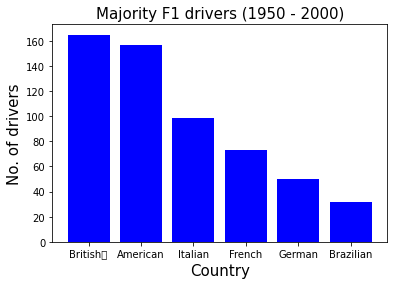

In [20]:
# create bar graph majority teams globally
x = np.arange(6)
drivers = [165, 157, 99, 73, 50, 32]

fig, ax = plt.subplots()

plt.bar(x, drivers, color='b')
plt.xticks(x, ('British	', 'American', 'Italian', 'French', 'German', 'Brazilian'))
plt.xlabel("Country",fontsize = 15)
plt.ylabel("No. of drivers",fontsize = 15)
plt.title("Majority F1 drivers (1950 - 2000)",fontsize = 15)

# Save an image of the chart and print it to the screen
plt.savefig("../project1/F1drivers.png")
plt.show()

In [ ]:
###Sort data based on drivers age

In [47]:
drivers = "Resources/drivers_new.csv"
drivers_df = pd.read_csv(drivers, encoding='latin1')
drivers_df.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,852.0,tsunoda,\N,TSU,Yuki,Tsunoda,11/05/2000,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
1,846.0,norris,4,NOR,Lando,Norris,13/11/1999,British,http://en.wikipedia.org/wiki/Lando_Norris
2,854.0,mick_schumacher,\N,SCH,Mick,Schumacher,22/03/1999,German,http://en.wikipedia.org/wiki/Mick_Schumacher
3,853.0,mazepin,\N,MAZ,Nikita,Mazepin,2/03/1999,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
4,840.0,stroll,18,STR,Lance,Stroll,29/10/1998,Canadian,http://en.wikipedia.org/wiki/Lance_Stroll


In [49]:
 #Getting the duplicate 
duplicate_rows = drivers_df[drivers_df.duplicated(['driverId','nationality'])]
clean_df = drivers_df.drop_duplicates("driverId")
clean_df

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,852.0,tsunoda,\N,TSU,Yuki,Tsunoda,11/05/2000,Japanese,http://en.wikipedia.org/wiki/Yuki_Tsunoda
1,846.0,norris,4,NOR,Lando,Norris,13/11/1999,British,http://en.wikipedia.org/wiki/Lando_Norris
2,854.0,mick_schumacher,\N,SCH,Mick,Schumacher,22/03/1999,German,http://en.wikipedia.org/wiki/Mick_Schumacher
3,853.0,mazepin,\N,MAZ,Nikita,Mazepin,2/03/1999,Russian,http://en.wikipedia.org/wiki/Nikita_Mazepin
4,840.0,stroll,18,STR,Lance,Stroll,29/10/1998,Canadian,http://en.wikipedia.org/wiki/Lance_Stroll
...,...,...,...,...,...,...,...,...,...
113,37.0,rosa,\N,DLR,Pedro,de la Rosa,24/02/1971,Spanish,http://en.wikipedia.org/wiki/Pedro_de_la_Rosa
114,69.0,badoer,\N,BAD,Luca,Badoer,25/01/1971,Italian,http://en.wikipedia.org/wiki/Luca_Badoer
115,104.0,fittipaldi,\N,\N,Christian,Fittipaldi,18/01/1971,Brazilian,http://en.wikipedia.org/wiki/Christian_Fittipaldi
116,64.0,diniz,\N,\N,Pedro,Diniz,22/05/1970,Brazilian,http://en.wikipedia.org/wiki/Pedro_Diniz


In [50]:
# cleaning and new dataframe
drivers_count = clean_df.groupby("nationality")["driverId"].nunique()
drivers_count_df = pd.DataFrame({"No. of drivers": drivers_count})
drivers_count_df

,No. of drivers
nationality,
American,2
Argentine,3
Australian,2
Austrian,3
Belgian,2
Brazilian,15
British,12
Canadian,3
Colombian,1


In [51]:
drivers_df = drivers_count_df.sort_values("No. of drivers", ascending = False)
drivers_df.head(10)

,No. of drivers
nationality,
Brazilian,15
British,12
German,11
French,9
Japanese,8
Italian,7
Spanish,6
Dutch,5
Russian,4


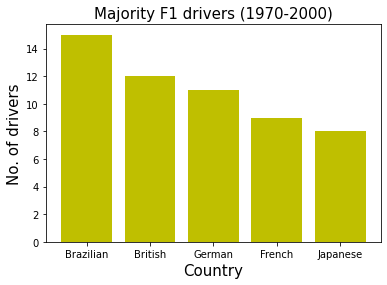

In [53]:
# create bar graph majority teams globally
x = np.arange(5)
drivers = [15, 12, 11, 9, 8]

fig, ax = plt.subplots()

plt.bar(x, drivers, color='y')
plt.xticks(x, ('Brazilian', 'British', 'German', 'French', 'Japanese'))
plt.xlabel("Country",fontsize = 15)
plt.ylabel("No. of drivers",fontsize = 15)
plt.title("Majority F1 drivers (1970-2000)",fontsize = 15)

# Save an image of the chart and print it to the screen
plt.savefig("../project1/F1drivers.png")
plt.show()

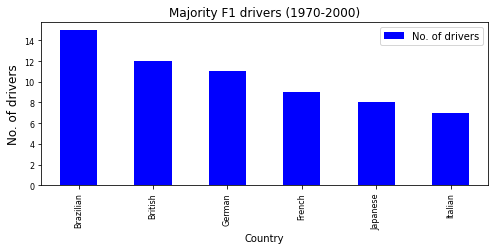

In [52]:
plot_pandas = drivers_df.head(6).plot.bar(figsize=(8,3), color='b',fontsize = 8)
plt.xlabel("Country",fontsize = 10)
plt.ylabel("No. of drivers",fontsize = 12)
plt.title("Majority F1 drivers (1970-2000)",fontsize = 12)

plt.show()


In [ ]:
## Finding number of constructors

In [21]:
# to find number of constructors per country
###File to Load and Read store into Pandas data frame
constructors = "Resources/constructors.csv"
constructors_df = pd.read_csv(constructors, delimiter=",")
constructors_df.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [22]:
# Getting the duplicate and dropping the duplicates to get clean data
duplicate_rows = constructors_df[constructors_df.duplicated(['constructorRef', 'nationality'])]
clean_df = constructors_df.drop_duplicates("constructorRef")
clean_df

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso
...,...,...,...,...,...
206,209,manor,Manor Marussia,British,http://en.wikipedia.org/wiki/Manor_Motorsport
207,210,haas,Haas F1 Team,American,http://en.wikipedia.org/wiki/Haas_F1_Team
208,211,racing_point,Racing Point,British,http://en.wikipedia.org/wiki/Racing_Point_F1_Team
209,213,alphatauri,AlphaTauri,Italian,http://en.wikipedia.org/wiki/Scuderia_AlphaTauri


In [23]:
# Calculate number of constructors per country
constructors_count = clean_df.groupby("nationality")["name"].nunique()
constructors_name = clean_df.groupby("nationality")["constructorRef"]

#write to the new dataframe
constructors_count_df = pd.DataFrame({"No. of constructors":constructors_count,"names of constructors":constructors_name })
constructors_count_df
    

C:\Users\Praveena\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1229: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  v = np.array(v, copy=False)
C:\Users\Praveena\anaconda3\lib\site-packages\pandas\core\dtypes\cast.py:1623: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  subarr = np.array(values, dtype=dtype, copy=copy)
C:\Users\Praveena\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths o

,No. of constructors,names of constructors
nationality,,
American,39,"(American, [penske, parnelli, eagle, scarab, w..."
Australian,1,"(Australian, [mcguire])"
Austrian,1,"(Austrian, [red_bull])"
Belgium,1,"(Belgium, [enb])"
Brazilian,1,"(Brazilian, [fittipaldi])"
British,86,"(British, [mclaren, williams, bar, jaguar, arr..."
Canadian,2,"(Canadian, [wolf, stebro])"
Dutch,3,"(Dutch, [spyker, spyker_mf1, boro])"
East German,1,"(East German, [emw])"


In [25]:
# Exporting a Pandas DataFrame to an Excel file
# determining the name of the file 
constructors_file = 'constructors.xlsx'
  
# saving the excel 
constructors_count_df.to_excel(constructors_file) 

In [26]:
# sorting the data with top 5 or 10 constructors
constructors_final_df = constructors_count_df.sort_values("No. of constructors", ascending = False)
constructors_final_df.head(5)

,No. of constructors,names of constructors
nationality,,
British,86,"(British, [mclaren, williams, bar, jaguar, arr..."
American,39,"(American, [penske, parnelli, eagle, scarab, w..."
Italian,30,"(Italian, [toro_rosso, ferrari, minardi, benet..."
French,13,"(French, [renault, prost, ligier, larrousse, a..."
German,10,"(German, [bmw_sauber, rial, zakspeed, kauhsen,..."


C:\Users\Praveena\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:238: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0.0, flags=flags)
C:\Users\Praveena\anaconda3\lib\site-packages\matplotlib\backends\backend_agg.py:201: RuntimeWarning: Glyph 9 missing from current font.
  font.set_text(s, 0, flags=flags)


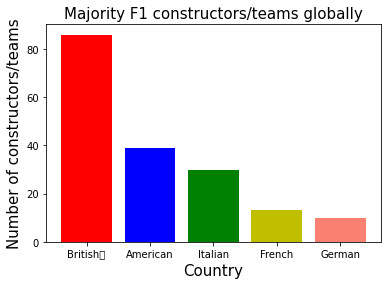

In [27]:
# create bar graph majority teams globally
x = np.arange(5)
constructors = [86, 39, 30, 13, 10]

fig, ax = plt.subplots()

plt.bar(x, constructors, color = ('r', 'b', 'g', 'y', 'salmon'))
plt.xticks(x, ('British	', 'American', 'Italian', 'French', 'German'))
plt.xlabel("Country",fontsize = 15)
plt.ylabel("Number of constructors/teams",fontsize = 15)
plt.title("Majority F1 constructors/teams globally",fontsize = 15)

# Save an image of the chart and print it to the screen
plt.savefig("../project1/constructors.png")
plt.show()

In [ ]:
## Finding the races in each country per year

In [28]:
#Finding the number of races in each country
#Reading the file
races = "Resources/races.csv"
races_df = pd.read_csv(races, encoding='latin1')
races_df.head

<bound method NDFrame.head of       raceId  year  round  circuitId                      name        date  \
0          1  2009      1          1     Australian Grand Prix  2009-03-29   
1          2  2009      2          2      Malaysian Grand Prix  2009-04-05   
2          3  2009      3         17        Chinese Grand Prix  2009-04-19   
3          4  2009      4          3        Bahrain Grand Prix  2009-04-26   
4          5  2009      5          4        Spanish Grand Prix  2009-05-10   
...      ...   ...    ...        ...                       ...         ...   
1053    1069  2021     19         69  United States Grand Prix  2021-10-24   
1054    1070  2021     20         32    Mexico City Grand Prix  2021-10-31   
1055    1071  2021     21         18      Brazilian Grand Prix  2021-11-14   
1056    1072  2021     22         77  Saudi Arabian Grand Prix  2021-11-28   
1057    1073  2021     23         24      Abu Dhabi Grand Prix  2021-12-05   

          time                   

In [29]:
#getting the duplicates
duplicate_rows = races_df[races_df.duplicated(['name', 'year'])]
duplicate_rows

,raceId,year,round,circuitId,name,date,time,url


In [30]:
# Optional: Get all the data for the duplicate name. 
all_duplicate_rows = races_df[races_df.duplicated(['name'])]
all_duplicate_rows

,raceId,year,round,circuitId,name,date,time,url
17,18,2008,1,1,Australian Grand Prix,2008-03-16,04:30:00,http://en.wikipedia.org/wiki/2008_Australian_G...
18,19,2008,2,2,Malaysian Grand Prix,2008-03-23,07:00:00,http://en.wikipedia.org/wiki/2008_Malaysian_Gr...
19,20,2008,3,3,Bahrain Grand Prix,2008-04-06,11:30:00,http://en.wikipedia.org/wiki/2008_Bahrain_Gran...
20,21,2008,4,4,Spanish Grand Prix,2008-04-27,12:00:00,http://en.wikipedia.org/wiki/2008_Spanish_Gran...
21,22,2008,5,5,Turkish Grand Prix,2008-05-11,12:00:00,http://en.wikipedia.org/wiki/2008_Turkish_Gran...
...,...,...,...,...,...,...,...,...
1051,1067,2021,17,15,Singapore Grand Prix,2021-10-03,12:10:00,http://en.wikipedia.org/wiki/2021_Singapore_Gr...
1052,1068,2021,18,22,Japanese Grand Prix,2021-10-10,05:10:00,http://en.wikipedia.org/wiki/2021_Japanese_Gra...
1053,1069,2021,19,69,United States Grand Prix,2021-10-24,19:10:00,http://en.wikipedia.org/wiki/2021_United_State...
1055,1071,2021,21,18,Brazilian Grand Prix,2021-11-14,18:10:00,http://en.wikipedia.org/wiki/2021_Brazilian_Gr...


In [31]:
# clean up the dataFrame
clean_df = races_df.drop_duplicates("name")
clean_df

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
5,6,2009,6,6,Monaco Grand Prix,2009-05-24,12:00:00,http://en.wikipedia.org/wiki/2009_Monaco_Grand...
6,7,2009,7,5,Turkish Grand Prix,2009-06-07,12:00:00,http://en.wikipedia.org/wiki/2009_Turkish_Gran...
7,8,2009,8,9,British Grand Prix,2009-06-21,12:00:00,http://en.wikipedia.org/wiki/2009_British_Gran...
8,9,2009,9,20,German Grand Prix,2009-07-12,12:00:00,http://en.wikipedia.org/wiki/2009_German_Grand...
9,10,2009,10,11,Hungarian Grand Prix,2009-07-26,12:00:00,http://en.wikipedia.org/wiki/2009_Hungarian_Gr...


In [33]:
# Calculating Average race by each year
races_count_df = clean_df.groupby("name")["year"].mean()
races_count_df

name
70th Anniversary Grand Prix      2020
Abu Dhabi Grand Prix             2009
Argentine Grand Prix             1998
Australian Grand Prix            2009
Austrian Grand Prix              2003
Azerbaijan Grand Prix            2017
Bahrain Grand Prix               2009
Belgian Grand Prix               2009
Brazilian Grand Prix             2009
British Grand Prix               2009
Caesars Palace Grand Prix        1982
Canadian Grand Prix              2008
Chinese Grand Prix               2009
Dallas Grand Prix                1984
Detroit Grand Prix               1988
Dutch Grand Prix                 1985
Eifel Grand Prix                 2020
Emilia Romagna Grand Prix        2020
European Grand Prix              2009
French Grand Prix                2008
German Grand Prix                2009
Hungarian Grand Prix             2009
Indian Grand Prix                2011
Indianapolis 500                 1960
Italian Grand Prix               2009
Japanese Grand Prix              2009
Korean 

In [34]:
#counting the races per location
races_count = races_df.groupby(["name"])["year"].count()
races_count
#creating data frame
races_count_df = pd.DataFrame({"No. of races": races_count})
races_count_df

,No. of races
name,
70th Anniversary Grand Prix,1
Abu Dhabi Grand Prix,13
Argentine Grand Prix,20
Australian Grand Prix,36
Austrian Grand Prix,34
Azerbaijan Grand Prix,4
Bahrain Grand Prix,17
Belgian Grand Prix,66
Brazilian Grand Prix,48


In [35]:
# sorting the data with top 5 or 10 countries with driving skills
races_location_df = races_count_df.sort_values("No. of races", ascending = False)
races_location_df.head(5)

,No. of races
name,
Italian Grand Prix,72
British Grand Prix,72
Monaco Grand Prix,67
Belgian Grand Prix,66
German Grand Prix,64


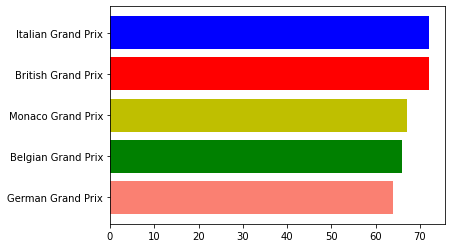

In [36]:
# create bar graph majority teams globally
y = np.arange(5)
country = [64, 66, 67, 72, 72]

fig, ay = plt.subplots()

plt.barh(y, country, color = ('salmon', 'g', 'y', 'r', 'b'))
plt.yticks(y, ('German Grand Prix', 'Belgian Grand Prix', 'Monaco Grand Prix', 'British Grand Prix', 'Italian Grand Prix'))
#plt.xlabel("Country",fontsize = 15)
#plt.ylabel("Number of constructors/teams",fontsize = 15)
#plt.title("Majority F1 constructors/teams globally",fontsize = 15)

# Save an image of the chart and print it to the screen
plt.savefig("../project1/races.png")
plt.show()

In [ ]:
#Attempting to see drivers vs wins in each race

In [37]:
drivers = "Resources/drivers.csv"
driver_standings = "Resources/driver_standings.csv"
drivers = pd.read_csv(drivers, encoding='latin1')
driver_standings = pd.read_csv(driver_standings, encoding='latin1')
drivers_df.head()

,No. of drivers
nationality,
British,165
American,157
Italian,99
French,73
German,50


In [41]:
#Merging 2 datas
drivers = pd.merge(drivers,driver_standings, how='inner', on='driverId')

In [42]:
# Getting the duplicate 
duplicate_rows = drivers[drivers.duplicated(['driverId','driverRef'])]
duplicate_rows

,driverId,driverRef,number,code,forename,surname,dob,nationality,url,driverStandingsId_x,...,points_x,position_x,positionText_x,wins_x,driverStandingsId_y,raceId_y,points_y,position_y,positionText_y,wins_y
1,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,...,10.0,1,1,1,9,19,14.0,1,1,1
2,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,...,10.0,1,1,1,27,20,14.0,3,3,1
3,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,...,10.0,1,1,1,48,21,20.0,2,2,1
4,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,...,10.0,1,1,1,69,22,28.0,3,3,1
5,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton,1,...,10.0,1,1,1,91,23,38.0,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3602544,850,pietro_fittipaldi,51,FIT,Pietro,Fittipaldi,1996-06-25,Brazilian,http://en.wikipedia.org/wiki/Pietro_Fittipaldi,70209,...,0.0,23,23,0,70163,1046,0.0,23,23,0
3602545,850,pietro_fittipaldi,51,FIT,Pietro,Fittipaldi,1996-06-25,Brazilian,http://en.wikipedia.org/wiki/Pietro_Fittipaldi,70209,...,0.0,23,23,0,70209,1047,0.0,23,23,0
3602547,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken,70162,...,0.0,22,22,0,70208,1047,0.0,22,22,0
3602548,851,aitken,89,AIT,Jack,Aitken,1995-09-23,British,http://en.wikipedia.org/wiki/Jack_Aitken,70208,...,0.0,22,22,0,70162,1046,0.0,22,22,0
